<a href="https://colab.research.google.com/github/Aswini-Dileep/Assignment/blob/main/Unsupervised_Learning_Fish_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [108]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster



Loading data set

In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
filepath = '/content/drive/MyDrive/DSA_Notes/Data Sets/fish.csv'

In [111]:
df_fish = pd.read_csv(filepath)
df_fish.head()

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2


In [112]:
df_fish.shape

(84, 7)

In [113]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bream   84 non-null     object 
 1   242.0   84 non-null     float64
 2   23.2    84 non-null     float64
 3   25.4    84 non-null     float64
 4   30.0    84 non-null     float64
 5   38.4    84 non-null     float64
 6   13.4    84 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.7+ KB


In [114]:
df_fish.describe()

,242.0,23.2,25.4,30.0,38.4,13.4
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,434.017857,27.388095,29.607143,33.157143,27.953571,12.859524
std,382.648669,11.348058,12.249630,13.272086,10.351142,2.129377
min,0.000000,9.300000,9.800000,10.800000,14.500000,8.700000
25%,120.000000,19.325000,20.950000,23.550000,16.875000,10.875000
50%,390.000000,28.450000,30.850000,35.050000,26.900000,13.700000
75%,657.500000,32.725000,36.000000,40.675000,39.225000,14.700000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,16.100000


In [115]:
df_fish.nunique()

,0
Bream,4
242.0,65
23.2,71
25.4,61
30.0,71
38.4,68
13.4,45


Preprocessing

In [116]:
df_fish['Bream'].unique()

array(['Bream', 'Roach', 'Smelt', 'Pike'], dtype=object)

Duplicate Removal

In [117]:
df_fish[df_fish.duplicated()].index

Index([], dtype='int64')

In [118]:
df_fish.T[df_fish.T.duplicated()].index

Index([], dtype='object')

Handling Missing Values

In [119]:
df_fish.isna().sum()

,0
Bream,0
242.0,0
23.2,0
25.4,0
30.0,0
38.4,0
13.4,0


Outlier Removal

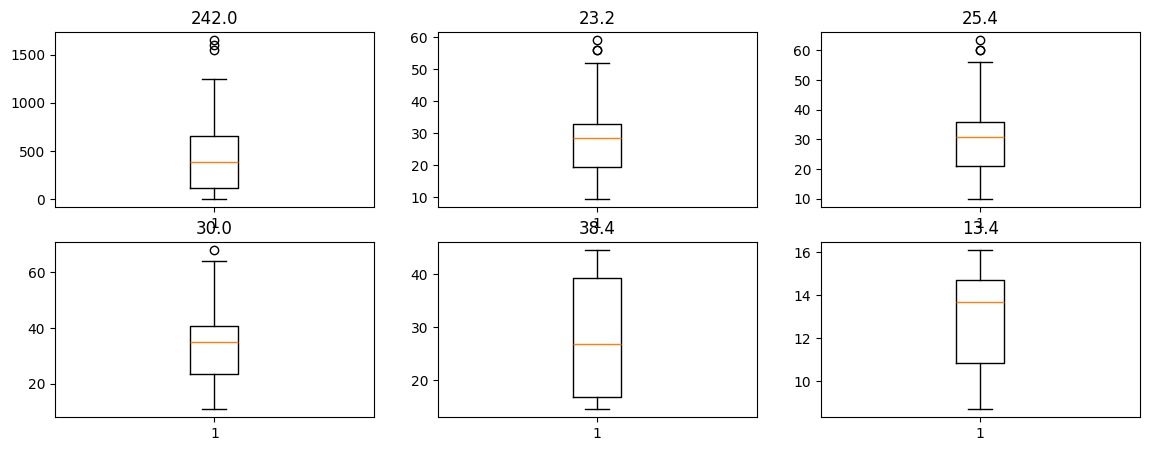

In [120]:
fig, ax = plt.subplots(2, 3, figsize = (14, 5))

ax[0,0].boxplot(x = df_fish['242.0'])
ax[0,0].set_title('242.0')

ax[0,1].boxplot(x = df_fish['23.2'])
ax[0,1].set_title('23.2')

ax[0,2].boxplot(x = df_fish['25.4'])
ax[0,2].set_title('25.4')

ax[1,0].boxplot(x = df_fish['30.0'])
ax[1,0].set_title('30.0')

ax[1,1].boxplot(x = df_fish['38.4'])
ax[1,1].set_title('38.4')

ax[1,2].boxplot(x = df_fish['13.4'])
ax[1,2].set_title('13.4')

plt.show()

In [121]:
Q1 = df_fish['242.0'].quantile(0.25)
Q3 = df_fish['242.0'].quantile(0.75)

IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
up_limit = Q3 + 1.5 * IQR


In [122]:
outliers = []
for i in df_fish['242.0']:
  if i < low_limit or i > up_limit:
    outliers.append(i)

print(outliers)

[1600.0, 1550.0, 1650.0]


In [123]:
df_fish['242.0'] = df_fish['242.0'].clip(low_limit, up_limit)

In [124]:
Q1 = df_fish['23.2'].quantile(0.25)
Q3 = df_fish['23.2'].quantile(0.75)

IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
up_limit = Q3 + 1.5 * IQR


In [125]:
outliers = []
for i in df_fish['23.2']:
  if i < low_limit or i > up_limit:
    outliers.append(i)

print(outliers)

[56.0, 56.0, 59.0]


In [126]:
df_fish['23.2'] = df_fish['23.2'].clip(low_limit, up_limit)

In [127]:
Q1 = df_fish['25.4'].quantile(0.25)
Q3 = df_fish['25.4'].quantile(0.75)

IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
up_limit = Q3 + 1.5 * IQR


In [128]:
outliers = []
for i in df_fish['25.4']:
  if i < low_limit or i > up_limit:
    outliers.append(i)

print(outliers)

[60.0, 60.0, 63.4]


In [129]:
df_fish['25.4'] = df_fish['25.4'].clip(low_limit, up_limit)

In [130]:
Q1 = df_fish['30.0'].quantile(0.25)
Q3 = df_fish['30.0'].quantile(0.75)

IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
up_limit = Q3 + 1.5 * IQR


In [131]:
outliers = []
for i in df_fish['30.0']:
  if i < low_limit or i > up_limit:
    outliers.append(i)

print(outliers)

[68.0]


In [132]:
df_fish['30.0'] = df_fish['30.0'].clip(low_limit, up_limit)

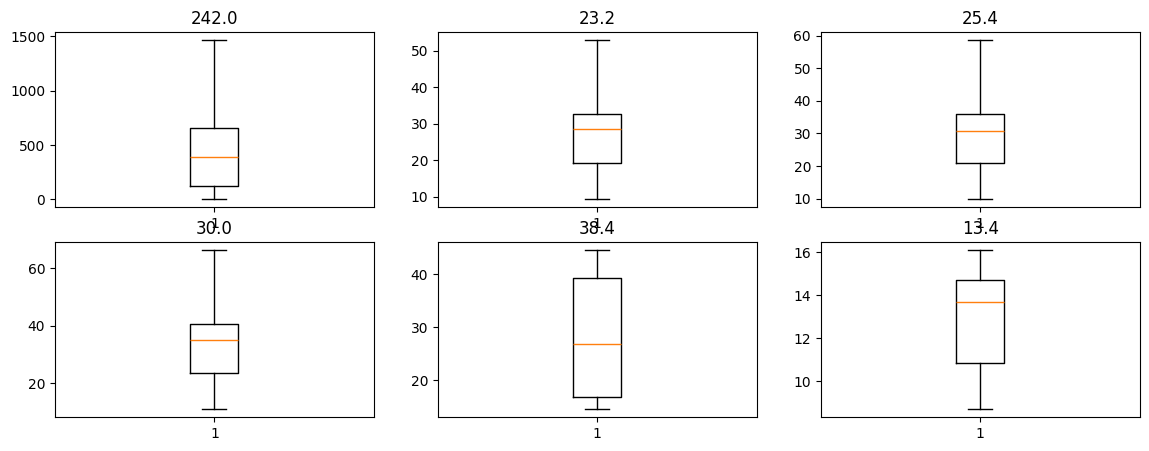

In [133]:
fig, ax = plt.subplots(2, 3, figsize = (14, 5))

ax[0,0].boxplot(x = df_fish['242.0'])
ax[0,0].set_title('242.0')

ax[0,1].boxplot(x = df_fish['23.2'])
ax[0,1].set_title('23.2')

ax[0,2].boxplot(x = df_fish['25.4'])
ax[0,2].set_title('25.4')

ax[1,0].boxplot(x = df_fish['30.0'])
ax[1,0].set_title('30.0')

ax[1,1].boxplot(x = df_fish['38.4'])
ax[1,1].set_title('38.4')

ax[1,2].boxplot(x = df_fish['13.4'])
ax[1,2].set_title('13.4')

plt.show()

Scaling

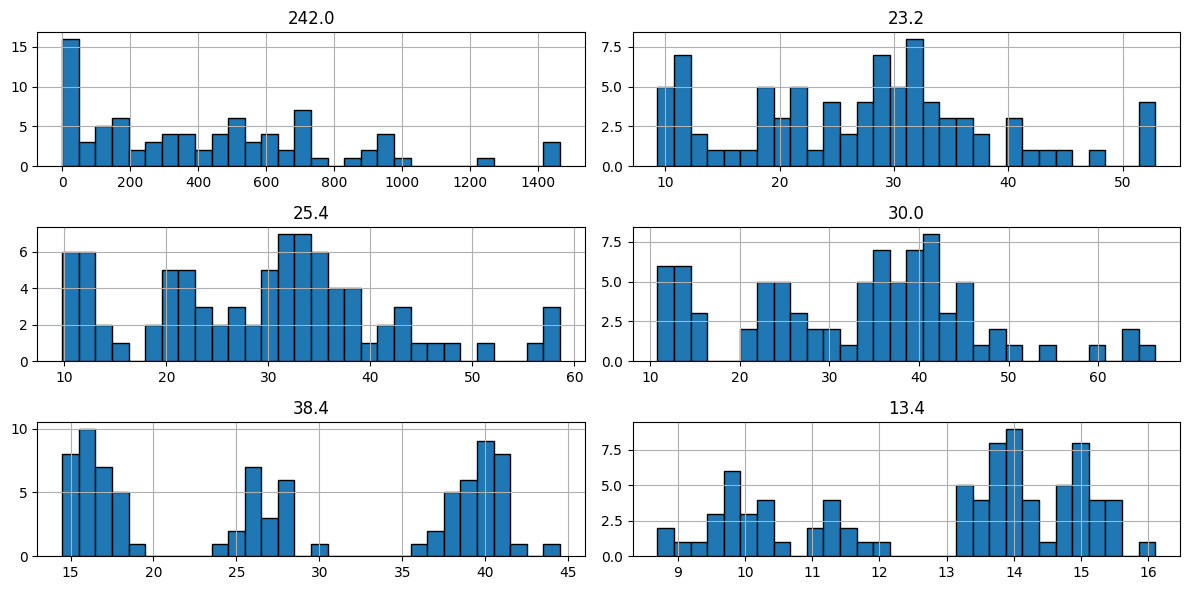

In [134]:
desired_columns = ['242.0', '23.2','25.4','30.0', '38.4','13.4']

# Plot histograms for selected columns of train data set
df_fish[desired_columns].hist(bins=30, figsize=(12, 6), edgecolor='black')
plt.tight_layout()
plt.show()

In [135]:
min_max_scale = MinMaxScaler(feature_range=(0,1))

df_fish['242.0'] = min_max_scale.fit_transform(df_fish[['242.0']])
df_fish['23.2'] = min_max_scale.fit_transform(df_fish[['23.2']])
df_fish['25.4'] = min_max_scale.fit_transform(df_fish[['25.4']])
df_fish['30.0'] = min_max_scale.fit_transform(df_fish[['30.0']])
df_fish['38.4'] = min_max_scale.fit_transform(df_fish[['38.4']])
df_fish['13.4'] = min_max_scale.fit_transform(df_fish[['13.4']])

In [136]:
df_fish

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,0.198121,0.337737,0.338288,0.367154,0.850000,0.689189
1,Bream,0.232280,0.335439,0.342389,0.365354,0.843333,0.864865
2,Bream,0.247993,0.390580,0.393644,0.408549,0.783333,0.621622
3,Bream,0.293766,0.395175,0.393644,0.417548,0.736667,0.864865
4,Bream,0.307430,0.402068,0.407996,0.430146,0.823333,0.743243
...,...,...,...,...,...,...,...
79,Pike,0.649018,0.896037,0.859047,0.797300,0.056667,0.337838
80,Pike,0.853971,0.981045,0.947207,0.880090,0.113333,0.405405
81,Pike,1.000000,1.000000,1.000000,0.957480,0.016667,0.121622
82,Pike,1.000000,1.000000,1.000000,0.957480,0.016667,0.121622


Encoding

In [137]:
label_enc = LabelEncoder()
df_fish['Bream'] = label_enc.fit_transform(df_fish['Bream'])

In [138]:
df_fish

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,0,0.198121,0.337737,0.338288,0.367154,0.850000,0.689189
1,0,0.232280,0.335439,0.342389,0.365354,0.843333,0.864865
2,0,0.247993,0.390580,0.393644,0.408549,0.783333,0.621622
3,0,0.293766,0.395175,0.393644,0.417548,0.736667,0.864865
4,0,0.307430,0.402068,0.407996,0.430146,0.823333,0.743243
...,...,...,...,...,...,...,...
79,1,0.649018,0.896037,0.859047,0.797300,0.056667,0.337838
80,1,0.853971,0.981045,0.947207,0.880090,0.113333,0.405405
81,1,1.000000,1.000000,1.000000,0.957480,0.016667,0.121622
82,1,1.000000,1.000000,1.000000,0.957480,0.016667,0.121622


## K-Means Cluster

In [139]:
X = df_fish.iloc[:,[1,6]].values

In [140]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

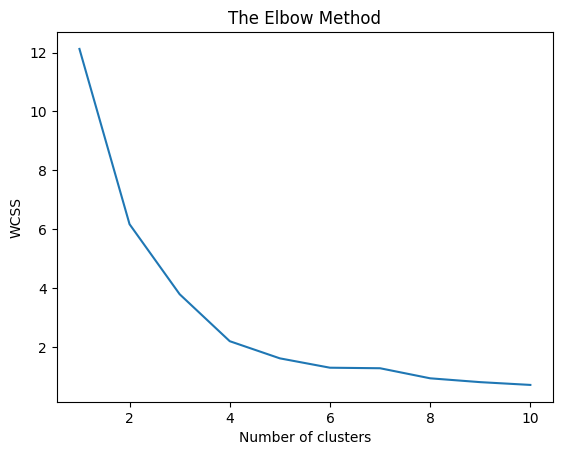

In [141]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [142]:
# From the elbow plot, we can fix value of k as 4
# buliding the kmeans clustering model.
kmeans = KMeans(n_clusters=4, init='k-means++')
# max_iter can be set if we need to fix the number of iterations
y_kmeans = kmeans.fit_predict(X) # output generation

In [143]:
df_fish['Cluster']=y_kmeans
df_fish.head()

,Bream,242.0,23.2,25.4,30.0,38.4,13.4,Cluster
0,0,0.198121,0.337737,0.338288,0.367154,0.850000,0.689189,0
1,0,0.232280,0.335439,0.342389,0.365354,0.843333,0.864865,0
2,0,0.247993,0.390580,0.393644,0.408549,0.783333,0.621622,0
3,0,0.293766,0.395175,0.393644,0.417548,0.736667,0.864865,0
4,0,0.307430,0.402068,0.407996,0.430146,0.823333,0.743243,3


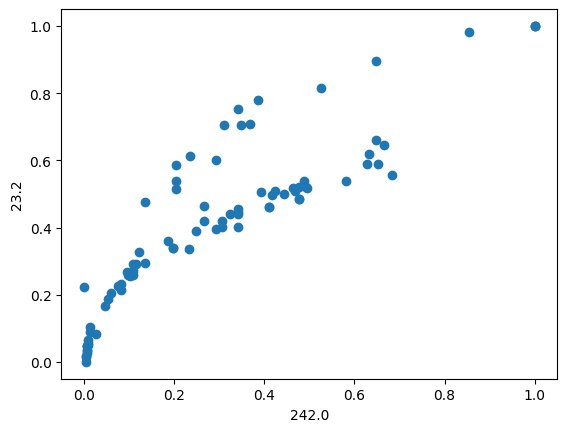

In [144]:
# before clustering
plt.scatter(df_fish['242.0'], df_fish['23.2'])
plt.xlabel('242.0')
plt.ylabel('23.2')
plt.show()


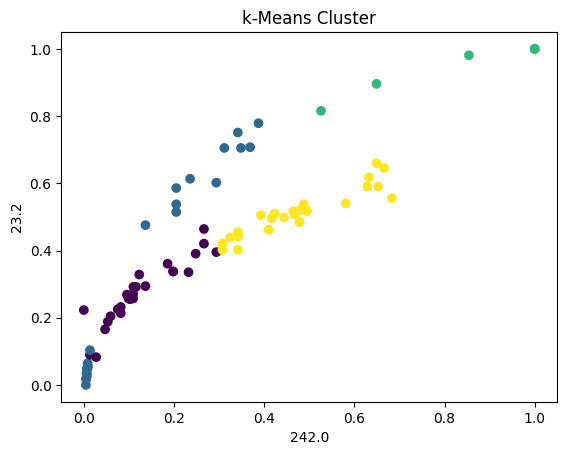

In [145]:
# after clustering
plt.scatter(df_fish['242.0'],
            df_fish['23.2'],
            c=df_fish['Cluster'])
plt.title('k-Means Cluster')
plt.xlabel('242.0')
plt.ylabel('23.2')
plt.show()

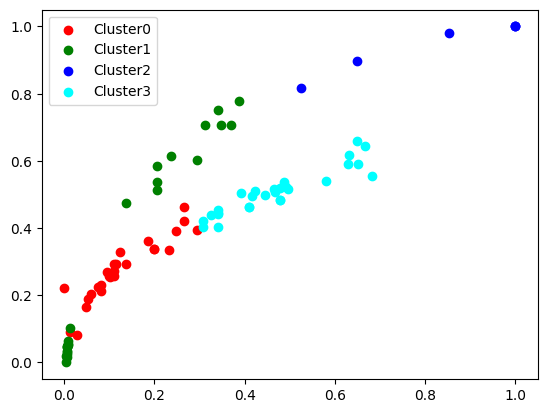

In [146]:
# assigning colour code for clusters
colors = ['red', 'green', 'blue', 'cyan']
for i in range(4):
  cluster_data = df_fish[df_fish['Cluster']==i]
  plt.scatter(cluster_data['242.0'],
        cluster_data['23.2'],
                           c=colors[i],
                           label=f'Cluster{i}')
  plt.legend()

In [147]:
# predict the cluster
def predict_cluster(new_data):
  cluster = kmeans.predict(new_data)
  return cluster[0]

In [148]:
predicted_cluster = predict_cluster([[50, 50]])
print('the values belong to the cluster ', predicted_cluster)

the values belong to the cluster  3


## Agglomerative Hierarchical clustering

In [149]:
ag_cluster = linkage(X ,method='ward')

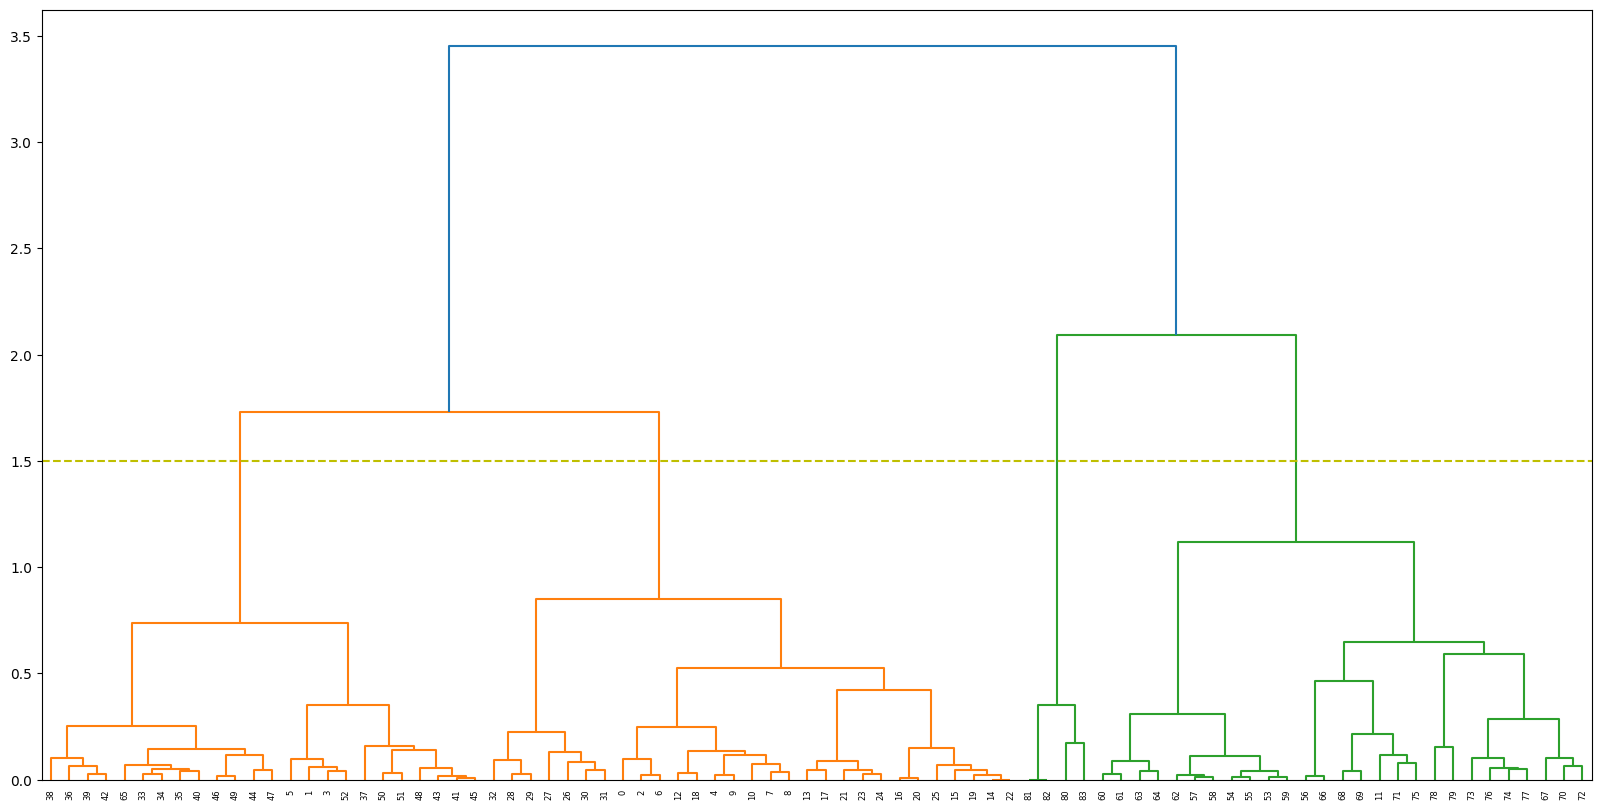

In [150]:
plt.figure(figsize=(20,10))
dendrogram(ag_cluster)
plt.axhline(y=1.5, color ='y', linestyle='--')
plt.show()

In [151]:
cluster_labels = fcluster(ag_cluster, t=1.5, criterion='distance')


df_fish['Cluster_Agglomerative']=cluster_labels
df_fish.head()

,Bream,242.0,23.2,25.4,30.0,38.4,13.4,Cluster,Cluster_Agglomerative
0,0,0.198121,0.337737,0.338288,0.367154,0.850000,0.689189,0,2
1,0,0.232280,0.335439,0.342389,0.365354,0.843333,0.864865,0,1
2,0,0.247993,0.390580,0.393644,0.408549,0.783333,0.621622,0,2
3,0,0.293766,0.395175,0.393644,0.417548,0.736667,0.864865,0,1
4,0,0.307430,0.402068,0.407996,0.430146,0.823333,0.743243,3,2


In [152]:
df_fish['Cluster_Agglomerative'].unique()

array([2, 1, 4, 3], dtype=int32)

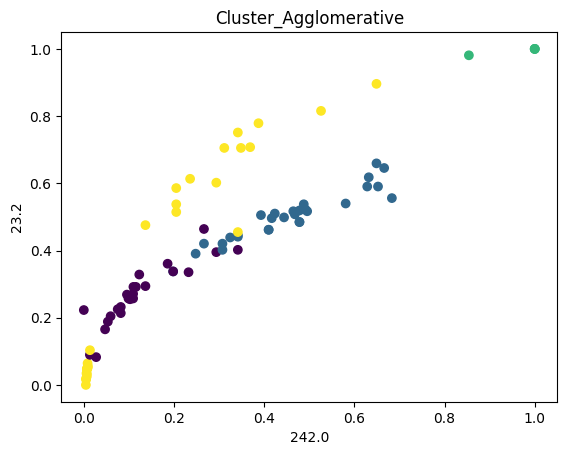

In [153]:
# after clustering
plt.scatter(df_fish['242.0'],
            df_fish['23.2'],
            c=df_fish['Cluster_Agglomerative'])
plt.title('Cluster_Agglomerative')
plt.xlabel('242.0')
plt.ylabel('23.2')
plt.show()

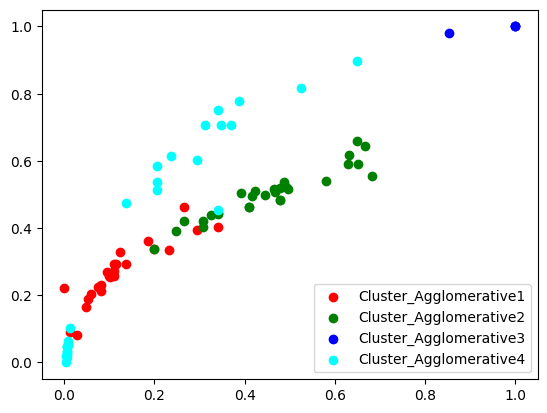

In [154]:
colors = ['red', 'green', 'blue', 'cyan']
for i in range(1,5):
  cluster_data = df_fish[df_fish['Cluster_Agglomerative']==i]
  plt.scatter(cluster_data['242.0'],
  	cluster_data['23.2'],
                           c=colors[i-1],
                           label=f'Cluster_Agglomerative{i}')
  plt.legend()

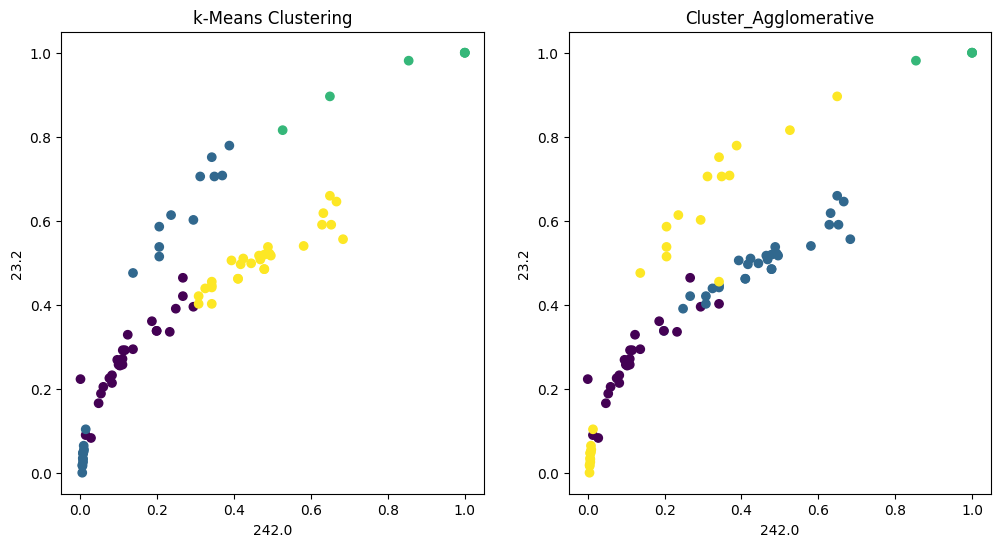

In [155]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(df_fish['242.0'],
            df_fish['23.2'],
            c=df_fish['Cluster'])
plt.title('k-Means Clustering')
plt.xlabel('242.0')
plt.ylabel('23.2')

plt.subplot(1,2,2)
plt.scatter(df_fish['242.0'],
            df_fish['23.2'],
            c=df_fish['Cluster_Agglomerative'])
plt.title('Cluster_Agglomerative')
plt.xlabel('242.0')
plt.ylabel('23.2')

plt.show()